![copyright](logo.png "Copyright (c) 2017, Bas Hoonhout")

<div style="text-align: right"> Copyright (c) 2023, Aeolis developer team </div>




In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import animation
import knmi
import pandas
from windrose import WindroseAxes, plot_windrose
%matplotlib notebook

In [167]:
# generate grids
[y_grid,x_grid] = np.mgrid[0:1000,0:100]
# save grid to files
np.savetxt('x2_grid.txt',x_grid,fmt='%.d')
np.savetxt('y2_grid.txt',y_grid,fmt='%.d')
np.savetxt('z2_grid.txt',np.zeros(np.shape(x_grid)),fmt='%.d')


supply = np.zeros(np.shape(x_grid)) 
#supply[:,0:20] = 0.00006
supply[:,0:21] = 5e-4
np.savetxt('supply3.txt',supply,fmt='%.10f')

In [45]:
# read wind time series

meteo1, legend = knmi.read_uurgeg('uurgeg_235_2001-2010.txt')
#meteo2, legend = knmi.read_uurgeg('uurgeg_235_2011-2020.txt')
# ix = (meteo['DD'] > 360.) | (meteo['FH'] >= 900)
# meteo = meteo['DD'][ix]=0

#meteo = pandas.concat((meteo1,meteo2))
meteo = meteo1

m = meteo.filter(['FH','DD'])

m = m.rename(columns={"FH": "speed", "DD": "direction"})
ix = (m['direction'] > 360.) | (m['speed'] >= 900)
m['direction'][ix]=0
m['speed'][ix]=0

alpha = 0.
#m = meteo[t0:t1].filter(['FH','DD'])
t = np.asarray([[x.total_seconds() for x in m.index - m.index[0]]]).T

m['speed'] = m['speed'].divide(10.)
m['direction'] = m['direction'].subtract(alpha)

In [48]:
np.savetxt('wind_10yr_onshore.txt', np.concatenate((t, m.values), axis=1))

In [47]:
#shrink and save
m['speed'][m['direction']<=180]=0
m['direction'][m['direction']<=180]=270

m['speed'][m['direction']>=360]=0
m['direction'][m['direction']>=360]=270


In [41]:
m.index[-1]

Timestamp('2010-12-31 22:30:00+0000', tz='UTC')

In [57]:
m.max()

speed         24.0
direction    360.0
dtype: float64

In [68]:
3600/180

20.0

<IPython.core.display.Javascript object>


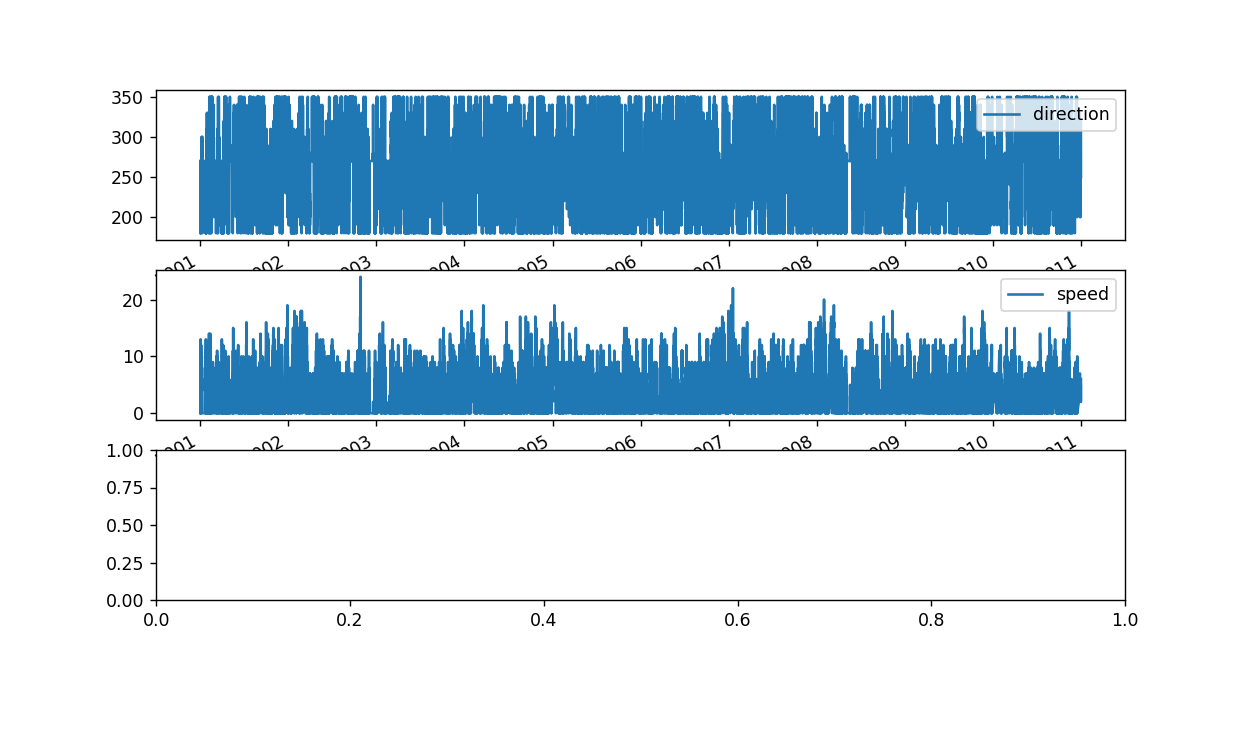

<IPython.core.display.Javascript object>


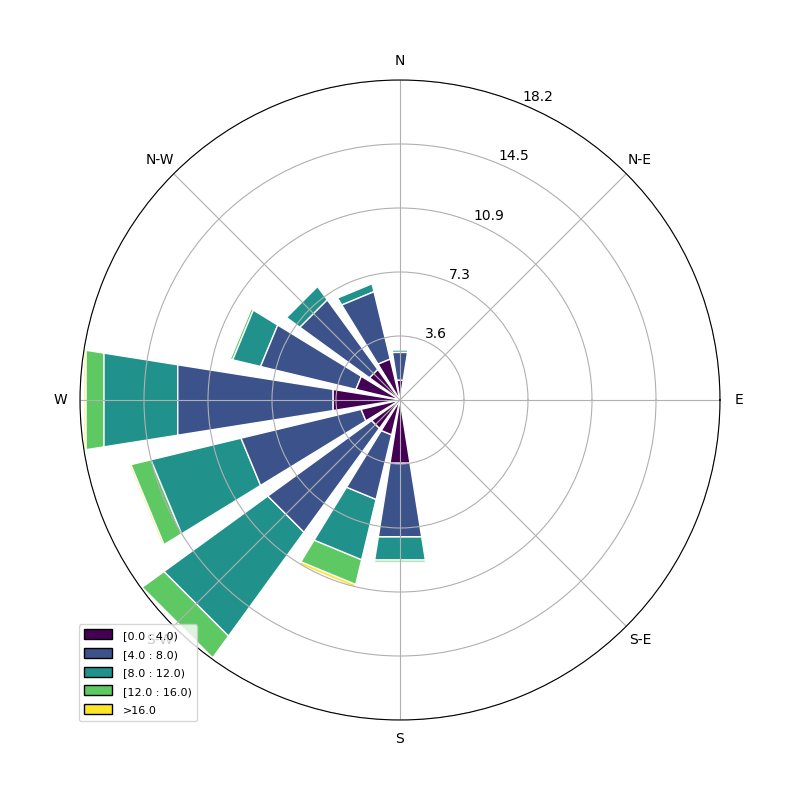

<WindroseAxes: >

In [245]:
fig, ax = plt.subplots(3,1,figsize=(10,6))

m.plot(y='direction',ax=ax[0])
m.plot(y='speed',ax=ax[1])
plot_windrose(m, kind='bar', normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 20, 4))



In [16]:
ncfile = 'Run4_90_long_new2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    #pickup = ds.variables['pickup'][...]
    #uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    udir= ds.variables['udir'][...]
   # q_sum= ds.variables['q_sum'][...]
   # q_avg= ds.variables['q_avg'][...]
    q= ds.variables['q'][...]
    #qs_sum= ds.variables['qs_sum'][...]
    #q_avg= ds.variables['q_avg'][...]
    qs= ds.variables['qs'][...]
    qn= ds.variables['qn'][...]
    #zs= ds.variables['zs'][...]
    
fig, ax = plt.subplots(4,figsize=(10,8))


#lets place this one at the top.
ax[0].plot(t,Ct[:,5,95,0])
ax[0].plot(t,Cu[:,5,95,0])
#ax[0].plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([6.125, 6.125],[0, 30],'r',lw=1)
#x0.set_xlim([0, 90e3/3600])
ax[1].plot(t,q[:,5,15,0],label='q')
ax[1].plot(t,qs[:,5,15,0],label='qs')
ax[1].plot(t,qn[:,5,15,0],label='qn')
ax[1].legend()

ax[2].plot(t,uw[:,5,95])

ax[3].plot(t,udir[:,5,95],'.')
ax[3].plot(t,np.ones(t.shape)*90)
ax[3].plot(t,np.ones(t.shape)*-90)
ax[3].set_ylim((-180,180))
#ax[2].plot(t,q_sum[:,5,95,0])
q[:,5,95,0].max()

FileNotFoundError: [Errno 2] No such file or directory: 'Run4_90_long_new2.nc'

In [11]:
(udir[:,5,95]==0).sum()

1

<IPython.core.display.Javascript object>


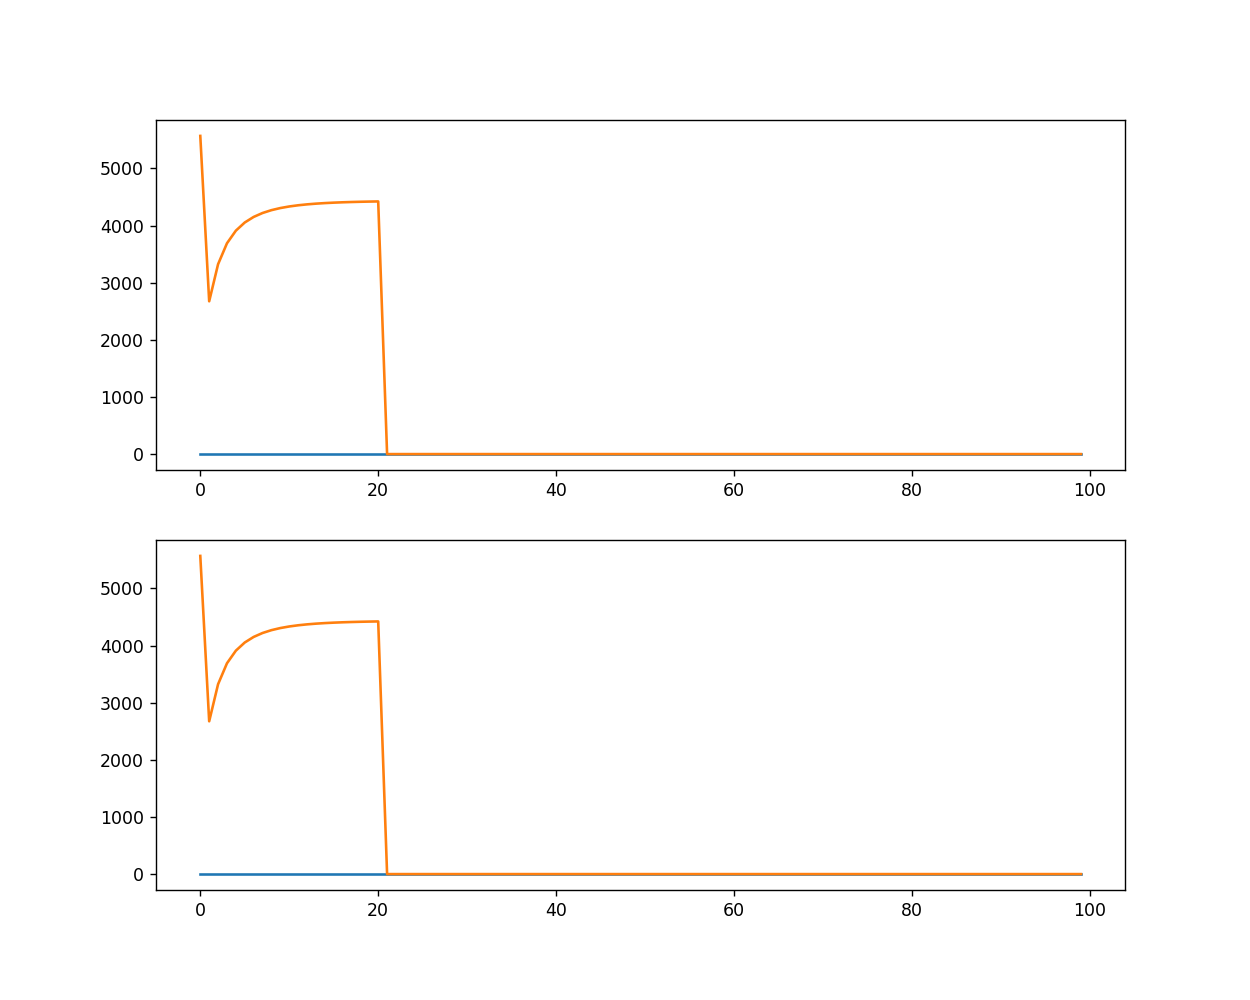

In [14]:
fig, ax = plt.subplots(2,figsize=(10,8))

ax[0].plot(np.transpose(mass[0:43,5,:,0,0]))
ax[1].plot(np.transpose(mass[:,5,:,0,0]))
bla=1

In [54]:
mass.shape


(877, 10, 100, 1, 1)

<IPython.core.display.Javascript object>


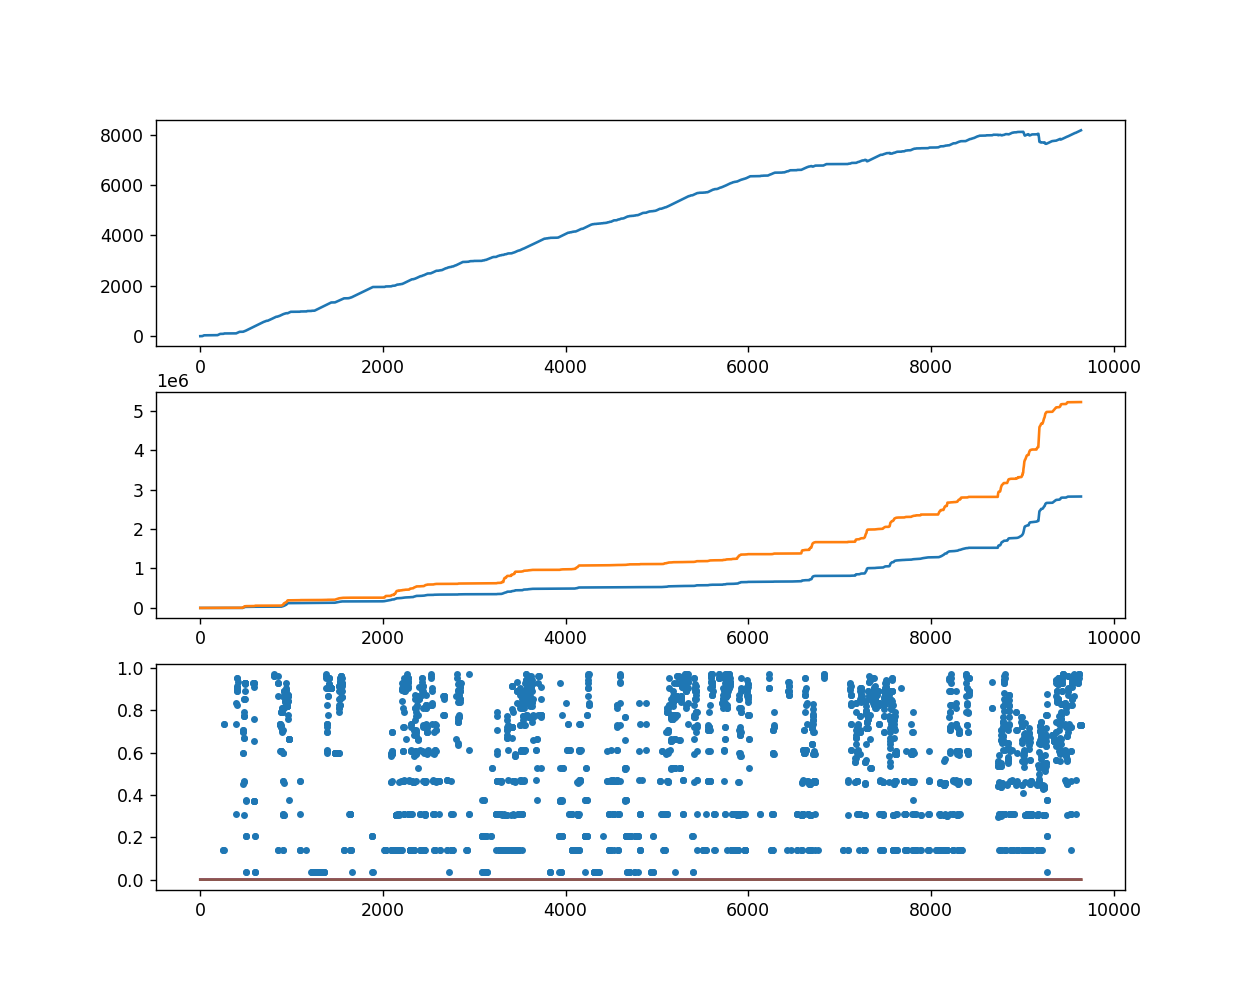

In [3]:
fig, ax = plt.subplots(3,figsize=(10,8))
ax[0].plot(mass[:,5,19,0,0])
ax[1].plot(np.cumsum((qs[:,5,-1,0]*86400)))
ax[1].plot(np.cumsum((Cu[:,5,-1,0]*uw[:,5,-1]*86400)))

ax[2].plot(qs[:,5,-1,0]/(Cu[:,5,-1,0]*uw[:,5,-1]),'.')


In [45]:
np.sum(Cu[:,5,-1,0]==0)/(Cu[:,5,-1,0].size)

0.541065206570433

<IPython.core.display.Javascript object>


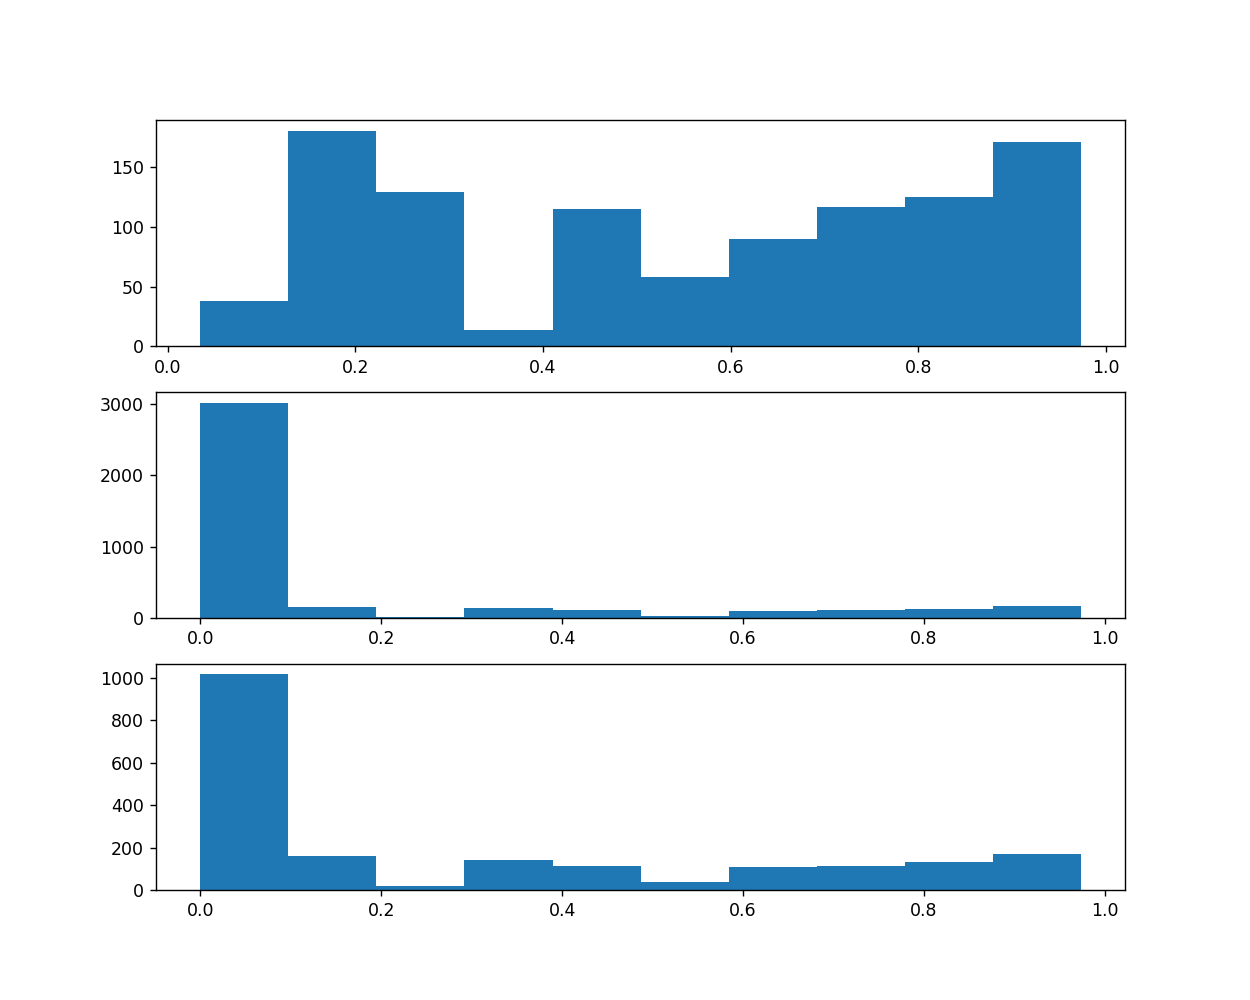

0.541065206570433

In [163]:
fig, ax = plt.subplots(3,figsize=(10,8))
supply= np.zeros(qs[:,5,-1,0].shape)
supply = qs[:,5,-1,0]/(Cu[:,5,-1,0]*uw[:,5,-1])
#supply[Cu[:,5,-1,0]==0]=0

ax[0].hist(supply, bins=10)
ax[1].hist(supply.filled(fill_value=0), bins=10)
ax[2].hist(supply.filled(fill_value=0)[uw[:,5,-1]!=0], bins=10)
plt.show()

(Cu.filled(fill_value=0)==0).sum()/(Cu.filled(fill_value=0)==0).size

In [184]:
a= np.random.rand(5,3)

b = np.zeros((3,a.shape[0],a.shape[1],))

b.shape

(3, 5, 3)

In [188]:
4*False

0

<IPython.core.display.Javascript object>


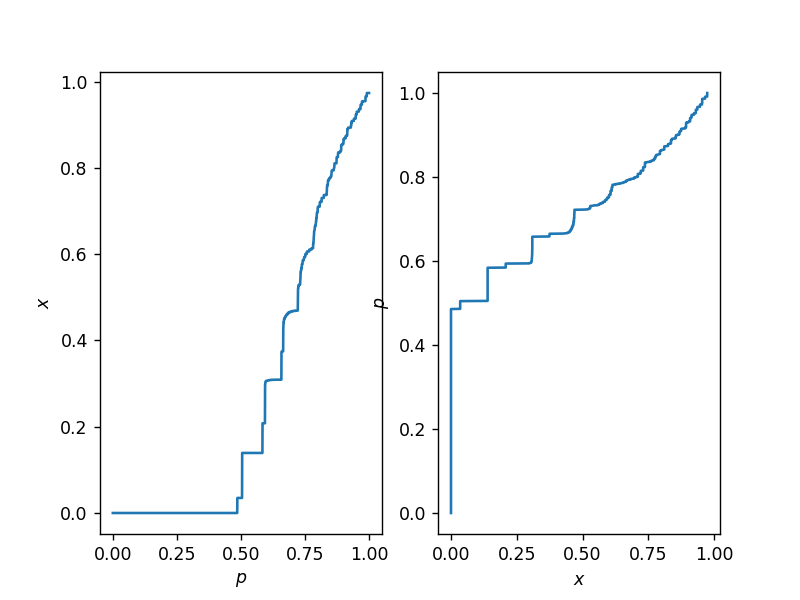

Text(0, 0.5, '$p$')

In [164]:
# lets make a PDF of the distribution of supply
# sort the data:
data_sorted = np.sort(supply.filled(fill_value=0)[uw[:,5,-1]!=0])

# calculate the proportional values of samples
p = 1. * np.arange(len(supply.filled(fill_value=0)[uw[:,5,-1]!=0])) / (len(supply.filled(fill_value=0)[uw[:,5,-1]!=0]) - 1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')



2174

array([0.00000000e+00, 2.48941997e-04, 4.97883993e-04, ...,
       9.99502116e-01, 9.99751058e-01, 1.00000000e+00])

In [135]:
p[-1

1.0

4.754762999520596e-08

In [49]:
print(q[:,5,95,0].sum(),qs_sum[:,5,95,0].sum(),q_avg[:,5,95,0].sum(), q_sum[:,5,95,0].sum()/q_avg[:,5,95,0].sum(),8640/60 )

5.465385497395342e-08 0.00026049546497779375 1.8093265242786544e-06 143.99999619287223 144.0


In [50]:
ncfile = 'Run4_42.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
     # get spatial dimensions and bed levels
    t42 = ds.variables['time'][:]
    Ct42 = ds.variables['Ct'][...]
    Cu42 = ds.variables['Cu'][...]
    mass42 = ds.variables['mass'][...]
    uw42= ds.variables['uw'][...]
    udir42= ds.variables['udir'][...]
    q42= ds.variables['qs'][...]
    
ncfile = 'Run4_90_2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    # get spatial dimensions and bed levels
    t90 = ds.variables['time'][:]
    Ct90 = ds.variables['Ct'][...]
    Cu90 = ds.variables['Cu'][...]
    mass90 = ds.variables['mass'][...]
    uw90= ds.variables['uw'][...]
    udir90= ds.variables['udir'][...]
    q90= ds.variables['qs'][...]

<IPython.core.display.Javascript object>


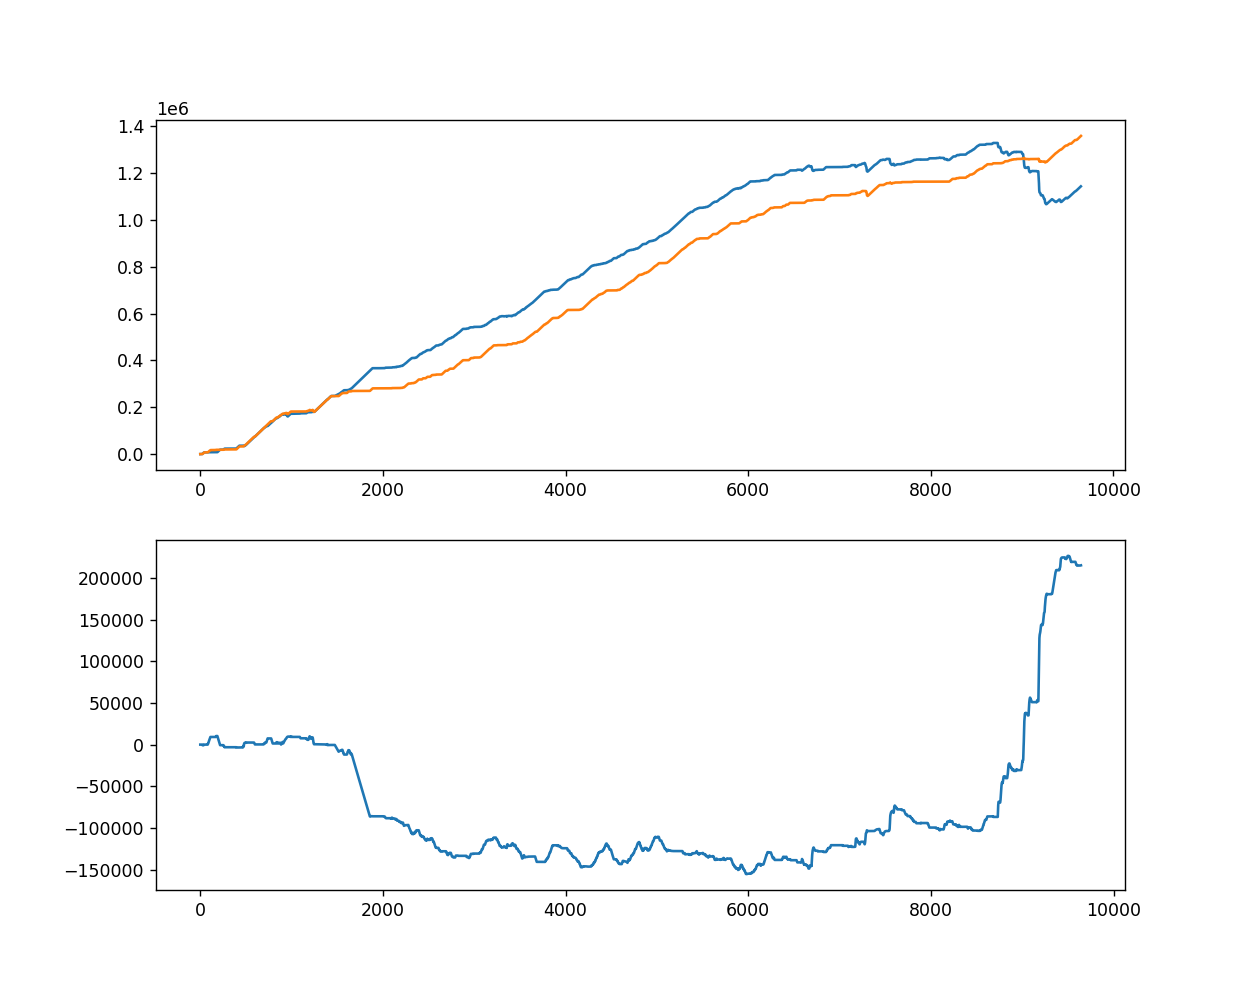

In [51]:
fig, ax = plt.subplots(2,figsize=(10,8))


# ax[0].plot(Ct42[:,5,80,0])#-Ct90[1:,5,80,0])
# ax[1].plot(Ct90[1:,5,80,0])
# ax[2].plot(Ct42[:,5,80,0]-Ct90[1:,5,80,0])

ax[0].plot(np.squeeze(np.sum(mass42,axis=(1,2))))#-Ct90[1:,5,80,0])
ax[0].plot(np.squeeze(np.sum(mass90,axis=(1,2))))
ax[1].plot(np.squeeze(np.sum(mass90,axis=(1,2)))[1:]-np.squeeze(np.sum(mass42,axis=(1,2))))

# ax[0].plot(np.cumsum(q42[:,5,80,0]))#-Ct90[1:,5,80,0])
# ax[0].plot(np.cumsum(q90[1:,5,80,0]))
# ax[1].plot(np.cumsum(q42[:,5,80,0]-q90[1:,5,80,0]))



In [44]:
np.squeeze(np.sum(mass42,axis=(1,2)))

masked_array(data=[      0.        ,       0.        ,       0.        ,
                   ..., 1142280.07923889, 1142630.02703857,
                   1142979.9786377 ],
             mask=False,
       fill_value=1e+20)